# # UMAP comparison

In [1]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler

import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck
from scipy.stats import mannwhitneyu
import h5py

INFO:numexpr.utils:Note: detected 192 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 192 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
SRP_name = 'aggregates'
resolution = '10kbp_raw' 


In [3]:
for resolution in [resolution]:
    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/{SRP_name}/{resolution}/max/spr/hic_gene_corr_inter_excluding_intra_chrom_pairs_hicexp.h5'

    jac_sim_spr = hm.hiCMatrix(exp_file_path)




    all_genes_spr = [x[3].decode() for x in jac_sim_spr.cut_intervals]
    df_jac_corr = pd.DataFrame(jac_sim_spr.matrix.toarray() ,  index=all_genes_spr, columns = all_genes_spr)
    

In [137]:
number_of_genes = 50

In [138]:
marker_list = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/metamarkers/human/type_markers_top1000.csv.gz', skiprows=1)
df_ensg_name = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/genomes_jlee/ensg_geneid_symbol.csv', sep='\t')[['Ensembl_gene_identifier', 'Symbol']]
marker_list = marker_list.merge(df_ensg_name.drop_duplicates(), right_on='Symbol', left_on='gene') 
#marker_list = marker_list[marker_list['rank'] < number_of_genes]
#m_number_of_genes = number_of_genes + 20
#marker_list[marker_list['rank'] < m_number_of_genes]
#marker_list.drop_duplicates(subset=['Ensembl_gene_identifier'],  inplace=True, keep=False)
all_cell_types = marker_list.drop_duplicates(['cell_type'])['cell_type'].tolist()
df2_list = []
            

        
for group2 in all_cell_types:
        df2_list.append(marker_list[marker_list['cell_type']==group2].sort_values(by=['rank']).head(number_of_genes))
        print ((marker_list[marker_list['cell_type']==group2].sort_values(by=['rank']).head(number_of_genes)).shape[0])
            
marker_list=pd.concat(df2_list)
marker_list = marker_list[marker_list['Ensembl_gene_identifier'].isin(all_genes_spr)]


/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning:

Columns (13,15,18,20,21) have mixed types.Specify dtype option on import or set low_memory=False.



50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50


In [139]:
marker_table = marker_list.pivot_table(index='Ensembl_gene_identifier', columns='cell_type', values='rank', aggfunc='sum')
marker_table.fillna(0, inplace=True)
marker_table[marker_table != 0] = 1
all_markers = marker_table.index.tolist()

In [140]:
control = marker_table.T

In [141]:
marker_list_t = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/metamarkers/human/subclass_markers_top1000.csv.gz', skiprows=1)

marker_list_t = marker_list_t.drop_duplicates(subset='cell_type')


In [134]:
control['cell_typet'] = [x.split('_')[0] for x in control.index.tolist()]
control2 = control.merge(marker_list_t[['group', 'cell_type']], left_on='cell_typet', right_on='cell_type')

In [135]:
control2

ENSG00000001460  ENSG00000001461  ENSG00000001626  ENSG00000001629  \
0                0.0              0.0              0.0              0.0   
1                0.0              0.0              0.0              0.0   
2                0.0              0.0              0.0              0.0   
3                0.0              0.0              0.0              0.0   
4                0.0              0.0              0.0              0.0   
..               ...              ...              ...              ...   
165              0.0              0.0              0.0              0.0   
166              0.0              0.0              0.0              0.0   
167              0.0              0.0              0.0              0.0   
168              0.0              0.0              0.0              0.0   
169              0.0              0.0              0.0              0.0   

     ENSG00000002587  ENSG00000002745  ENSG00000002746  ENSG00000003137  \
0                0.0              0.0              0.0              0.0   
1                0.0              0.0              0.0              0.0   
2                0.0              0.0              0.0              0.0   
3                0.0              0.0              0.0              0.0   
4                0.0              0.0              0.0              0.0   
..               ...              ...              ...              ...   
165              0.0              0.0              0.0              0.0   
166              0.0              0.0              0.0              0.0   
167              0.0              0.0              0.0              0.0   
168              0.0              0.0              0.0              0.0   
169              0.0              0.0              0.0              0.0   

     ENSG00000003402  ENSG00000003436  ...  ENSG00000280953  ENSG00000283154  \
0                0.0              0.0  ...              0.0              0.0   
1                0.0              0.0  ...              0.0              0.0   
2                0.0              0.0  ...              0.0              0.0   
3                0.0              0.0  ...              0.0              0.0   
4                0.0              0.0  ...              0.0              0.0   
..               ...              ...  ...              ...              ...   
165              0.0              0.0  ...              0.0              0.0   
166              0.0              0.0  ...              0.0              0.0   
167              0.0              0.0  ...              0.0              0.0   
168              0.0              0.0  ...              0.0              0.0   
169              0.0              0.0  ...              0.0              0.0   

     ENSG00000283486  ENSG00000283674  ENSG00000283982  ENSG00000285253  \
0                0.0              0.0              0.0              1.0   
1                0.0              0.0              0.0              0.0   
2                0.0              0.0              0.0              0.0   
3                0.0              1.0              0.0              0.0   
4                0.0              0.0              0.0              0.0   
..               ...              ...              ...              ...   
165              0.0              0.0              0.0              0.0   
166              0.0              0.0              0.0              0.0   
167              0.0              0.0              0.0              0.0   
168              0.0              0.0              0.0              0.0   
169              0.0              0.0              0.0              0.0   

     ENSG00000285294  cell_typet         group  cell_type  
0                0.0       Astro  Non-neuronal      Astro  
1                0.0       Astro  Non-neuronal      Astro  
2                0.0       Astro  Non-neuronal      Astro  
3                0.0       Astro  Non-neuronal      Astro  
4                0.0       Astro  Non-neu

In [136]:
from umap import UMAP
import plotly.express as px
import seaborn as sns

df = control2


features = df.loc[:, :'ENSG00000285294']
#features = df.loc[:, nongene_bins_all_present]


umap_2d = UMAP(n_components=2, init='random', random_state=0)


proj_2d = umap_2d.fit_transform(features)
fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.group, labels={'color': 'group'}, color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta", "tomato", "black", "lime", "cyan", "teal", "aqua", "lime", "chocolate", "violet", "black", "lightcoral", "yellowgreen", "orchid", "grey"]
)


fig_2d.show()



In [104]:
from sklearn.preprocessing import StandardScaler

df = control2
# Separating out the features
features = df.loc[:, :'ENSG00000285294']

# Separating out the target
#y = df.loc[:,['target']].values

# Standardizing the features
features  = StandardScaler().fit_transform(features)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(features)

fig_2d = px.scatter(
    principalComponents, x=0, y=1,
    color=df.group, labels={'color': 'group'}, color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta", "tomato", "black", "lime", "cyan", "teal", "aqua", "lime", "chocolate", "violet", "black", "lightcoral", "yellowgreen", "orchid", "grey"]
)



fig_2d.show()



In [ ]:
%matplotlib inline
import seaborn as sns
df['x'] = proj_2d[:,0]
df['y'] = proj_2d[:,1]
sns.scatterplot(x=df['x'], y=df['y'], hue=df['group'])

<AxesSubplot:xlabel='x', ylabel='y'>

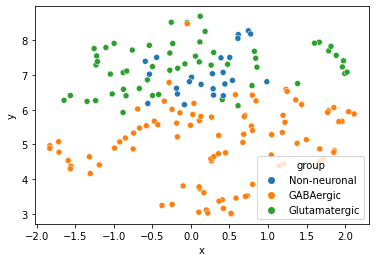

In [101]:
%matplotlib inline
import seaborn as sns
df['x'] = proj_2d[:,0]
df['y'] = proj_2d[:,1]
sns.scatterplot(x=df['x'], y=df['y'], hue=df['group'])

<AxesSubplot:xlabel='x', ylabel='y'>

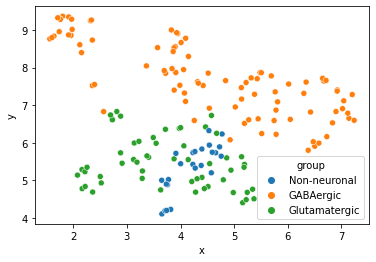

In [73]:
%matplotlib inline
import seaborn as sns
df['x'] = proj_2d[:,0]
df['y'] = proj_2d[:,1]
sns.scatterplot(x=df['x'], y=df['y'], hue=df['group'])

<AxesSubplot:xlabel='x', ylabel='y'>

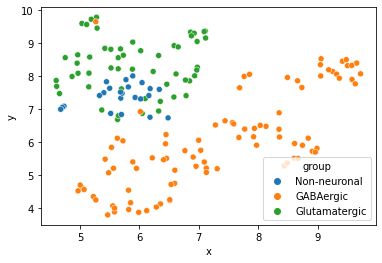

In [13]:
%matplotlib inline
import seaborn as sns
df['x'] = proj_2d[:,0]
df['y'] = proj_2d[:,1]
sns.scatterplot(x=df['x'], y=df['y'], hue=df['group'])

<AxesSubplot:xlabel='x', ylabel='y'>

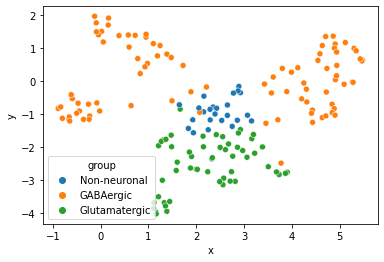

In [83]:
%matplotlib inline
import seaborn as sns
df['x'] = proj_2d[:,0]
df['y'] = proj_2d[:,1]
sns.scatterplot(x=df['x'], y=df['y'], hue=df['group'])

<AxesSubplot:xlabel='x', ylabel='y'>

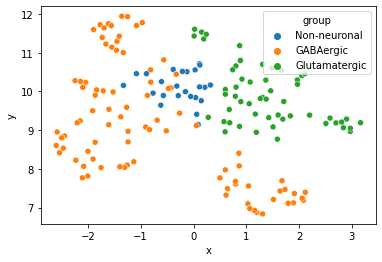

In [92]:
%matplotlib inline
import seaborn as sns
df['x'] = proj_2d[:,0]
df['y'] = proj_2d[:,1]
sns.scatterplot(x=df['x'], y=df['y'], hue=df['group'])

In [48]:
from umap import UMAP
import plotly.express as px

df = control2


features = df.loc[:, :'ENSG00000288015']
#features = df.loc[:, nongene_bins_all_present]


umap_2d = UMAP(n_components=2, init='random', random_state=3)


proj_2d = umap_2d.fit_transform(features)
fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.group, labels={'color': 'group'}, color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta", "tomato", "black", "lime", "cyan", "teal", "aqua", "lime", "chocolate", "violet", "black", "lightcoral", "yellowgreen", "orchid", "grey"]
)


fig_2d.show()

In [49]:
from umap import UMAP
import plotly.express as px

df = control2


features = df.loc[:, :'ENSG00000288015']
#features = df.loc[:, nongene_bins_all_present]


umap_2d = UMAP(n_components=2, init='random', random_state=0)


proj_2d = umap_2d.fit_transform(features)
fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.group, labels={'color': 'group'}, color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta", "tomato", "black", "lime", "cyan", "teal", "aqua", "lime", "chocolate", "violet", "black", "lightcoral", "yellowgreen", "orchid", "grey"]
)


fig_2d.show()

In [46]:
control2

ENSG00000000971  ENSG00000001460  ENSG00000001461  ENSG00000001561  \
0                0.0              0.0              0.0              0.0   
1                0.0              0.0              0.0              0.0   
2                0.0              0.0              0.0              0.0   
3                0.0              0.0              0.0              0.0   
4                0.0              0.0              0.0              0.0   
..               ...              ...              ...              ...   
165              0.0              0.0              0.0              0.0   
166              0.0              0.0              0.0              0.0   
167              0.0              0.0              0.0              0.0   
168              0.0              0.0              0.0              0.0   
169              0.0              0.0              0.0              0.0   

     ENSG00000001626  ENSG00000001629  ENSG00000001630  ENSG00000002586  \
0                0.0              0.0              0.0              0.0   
1                0.0              0.0              0.0              0.0   
2                0.0              0.0              0.0              0.0   
3                0.0              0.0              0.0              0.0   
4                0.0              0.0              0.0              0.0   
..               ...              ...              ...              ...   
165              0.0              0.0              0.0              0.0   
166              0.0              0.0              0.0              0.0   
167              0.0              0.0              0.0              0.0   
168              0.0              0.0              0.0              0.0   
169              0.0              0.0              0.0              0.0   

     ENSG00000002587  ENSG00000002745  ...  ENSG00000287215  ENSG00000287364  \
0                0.0              0.0  ...              0.0              0.0   
1                0.0              0.0  ...              0.0              0.0   
2                0.0              0.0  ...              0.0              0.0   
3                0.0              0.0  ...              0.0              0.0   
4                0.0              0.0  ...              0.0              0.0   
..               ...              ...  ...              ...              ...   
165              0.0              0.0  ...              0.0              0.0   
166              0.0              0.0  ...              0.0              0.0   
167              0.0              0.0  ...              0.0              0.0   
168              0.0              0.0  ...              0.0              0.0   
169              0.0              0.0  ...              0.0              0.0   

     ENSG00000287542  ENSG00000287776  ENSG00000287803  ENSG00000287925  \
0                0.0              0.0              0.0              0.0   
1                0.0              0.0              0.0              0.0   
2                0.0              0.0              0.0              0.0   
3                0.0              0.0              0.0              0.0   
4                0.0              0.0              0.0              0.0   
..               ...              ...              ...              ...   
165              0.0              0.0              0.0              0.0   
166              0.0              0.0              0.0              0.0   
167              0.0              0.0              0.0              0.0   
168              0.0              0.0              0.0              0.0   
169              0.0              0.0              0.0              0.0   

     ENSG00000288015  cell_typet         group  cell_type  
0                0.0       Astro  Non-neuronal      Astro  
1                0.0       Astro  Non-neuronal      Astro  
2                0.0       Astro  Non-neuronal      Astro  
3                0.0       Astro  Non-neuronal      Astro  
4                0.0       Astro  Non-neu